In [118]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as py
from tqdm import tqdm

pd.options.plotting.backend = "plotly"

stocks = ak.stock_board_industry_cons_ths(symbol="白酒")

all_pe = pd.DataFrame()
all_pb = pd.DataFrame()
all_ps = pd.DataFrame()
all_dv = pd.DataFrame()
all_mv = pd.DataFrame()

for i in tqdm(range(len(stocks))):
    code = stocks.loc[i, "代码"]

    ind = ak.stock_a_lg_indicator(code)
    ind.to_csv("value-{}.csv".format(code))
    pe = pd.Series(list(ind["pe_ttm"]), index=pd.to_datetime(ind["trade_date"]))
    pb = pd.Series(list(ind["pb"]), index=pd.to_datetime(ind["trade_date"]))
    ps = pd.Series(list(ind["ps_ttm"]), index=pd.to_datetime(ind["trade_date"]))
    dv = pd.Series(list(ind["dv_ttm"]), index=pd.to_datetime(ind["trade_date"]))
    mv = pd.Series(list(ind["total_mv"]), index=pd.to_datetime(ind["trade_date"]))
    pe_df = pd.DataFrame({code: pe}).fillna(0)
    pb_df = pd.DataFrame({code: pb}).fillna(0)
    ps_df = pd.DataFrame({code: ps}).fillna(0)
    dv_df = pd.DataFrame({code: dv}).fillna(0)
    mv_df = pd.DataFrame({code: mv}).fillna(0)
    all_pe = pd.concat([all_pe, pe_df], axis=1)
    all_pb = pd.concat([all_pb, pb_df], axis=1)
    all_ps = pd.concat([all_ps, ps_df], axis=1)
    all_dv = pd.concat([all_dv, dv_df], axis=1)
    all_mv = pd.concat([all_mv, mv_df], axis=1)

cols = all_pe.columns.values
trace_list = []
for i in range(0, len(cols)):
    trace_list.append(go.Scatter(x=all_pe.index, y=all_pe[cols[i]], mode="lines", name=cols[i]))

fig = go.Figure(trace_list)
py.plot(fig)
# print(all_pe)
# print(all_pe[:])
# print(ind_df)
# plt.style.use('ggplot')
# color_palette = sns.color_palette("hls", 5)
# plt.rcParams['font.sans-serif'] = ['Times New Roman']
# fig = plt.figure(figsize=(16, 12))
# pd.set_option('plotting.backend', 'matplotlib')

# fig = make_subplots(rows=5, cols=1)

# fig.append_trace(go.Scatter(x=all_pe.index, y=all_pe[:], mode="lines", name="pe"), 1, 1)
# fig.update_layout(width=1500, height=(len(cols) * 600))
# fig.show()

100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


'temp-plot.html'

In [108]:
# all_pe.pop('000860')
all_pe.pop('000995')
all_pe.pop('600199')
all_pe.pop('600696')

trade_date
2003-01-06     28.8672
2003-01-07     29.1338
2003-01-08     30.0478
2003-01-09     30.6190
2003-01-10     29.8574
                ...   
2022-12-26    316.7997
2022-12-27    321.3129
2022-12-28    316.1729
2022-12-29    312.1612
2022-12-30    311.9105
Name: 600696, Length: 4856, dtype: float64

In [109]:
print(all_pe)

             000568   600197   002646   000858   600559    600809   603198  \
trade_date                                                                   
2003-01-06  47.7800  41.5829      NaN  19.1263  61.3231  144.7977      NaN   
2003-01-07  47.7800  41.5829      NaN  18.9390  61.5155  144.7977      NaN   
2003-01-08  48.4688  42.3991      NaN  19.3307  64.2096  149.0015      NaN   
2003-01-09  49.4707  43.3060      NaN  19.6713  65.2360  152.5047      NaN   
2003-01-10  49.2203  43.1246      NaN  19.5862  63.6323  149.4686      NaN   
...             ...      ...      ...      ...      ...       ...      ...   
2022-12-26  32.3457  63.0839  96.1176  26.6238  36.9894   45.5640  29.5007   
2022-12-27  33.0878  63.5660  97.3343  26.9890  37.7096   46.2595  30.9942   
2022-12-28  33.3570  61.7897  94.0493  26.8593  37.3699   46.1544  30.6639   
2022-12-29  32.5941  61.2314  91.5551  26.6461  37.0981   45.7468  30.7921   
2022-12-30  33.3540  62.2718  93.0759  26.9353  37.4107   46.096

In [110]:
cols = all_pe.columns.values
trace_list = []
for i in range(0, len(cols)):
    trace_list.append(go.Scatter(x=all_pe.index, y=all_pe[cols[i]], mode="lines", name=cols[i]))

fig = go.Figure(trace_list)
py.plot(fig)

# print(10 **8)

'temp-plot.html'

In [ ]:
import pandas as pd
import pandas_bokeh
import numpy as np

np.random.seed(42)
df = pd.DataFrame({"谷歌": np.random.randn(1000) + 0.2, 
                    "苹果": np.random.randn(1000) + 0.17}, index=pd.date_range('1/1/2022', periods=1000))

df = df.cumsum()
df = df + 50
pd.set_option('plotting.backend', '')

# pandas_bokeh.output_notebook()
df.plot_bokeh.line()

In [117]:
(35.77-22.875)/3

print((35.77+9.98)/2)

print(22.875 + 1.5*4.29833)

print(22.875 - 1.5*4.29833)

22.875
29.322495
16.427505


In [3]:
#价值分析1: PE分析

import numpy as np
import pandas as pd
import akshare as ak
from tqdm import tqdm

def get_industry_pe(industry: str):
    stocks = ak.stock_board_industry_cons_ths(symbol=industry)

    all_stock = pd.DataFrame()

    stock_len = len(stocks)
    # 生成excel表格
    # sheet_writer = pd.ExcelWriter(f'{industry}_pe.xlsx')

    for i in tqdm(range(stock_len)):
        # market = 'sz'
        code = stocks.loc[i, "代码"]
        name = stocks.loc[i, "名称"]
        lg_ind = ak.stock_a_lg_indicator(symbol=code)
        lg_ind = lg_ind[lg_ind['pe_ttm'].notnull()]
        lg_ind['code'] = code
        lg_ind['net_profit'] = lg_ind['total_mv'] / lg_ind['pe_ttm']
        all_stock = pd.concat([all_stock, lg_ind], ignore_index=True)

    out = all_stock.groupby('trade_date')[['total_mv', 'net_profit']].sum()
    out['stock_size'] = all_stock.groupby('trade_date').size()
    out['average_pe'] = out['total_mv'] / out['net_profit']

    return out

In [ ]:
industry = "白酒"

industry_pe = get_industry_pe(industry)

In [129]:
# print(industry_pe)
import matplotlib.pyplot as plt

industry_pe['average_pe'].plot(kind='line')

In [12]:
import akshare as ak
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.plotting.backend = "matplotlib"

all_industry = ak.stock_board_industry_summary_ths()

all_industry_pe = {}
for i, row in all_industry.iterrows():
    industry = row['板块']
    print(f"get {industry}...")
    
    industry_pe = get_industry_pe(industry)
    all_industry_pe[industry] = industry_pe

get 金属新材料...


100%|██████████| 24/24 [00:17<00:00,  1.34it/s]


get 电力设备...


100%|██████████| 327/327 [03:51<00:00,  1.41it/s]


get 汽车零部件...


100%|██████████| 206/206 [02:29<00:00,  1.37it/s]


get 小金属...


100%|██████████| 39/39 [00:35<00:00,  1.09it/s]


get 其他电子...


100%|██████████| 36/36 [00:23<00:00,  1.55it/s]


get 化工合成材料...


100%|██████████| 107/107 [01:17<00:00,  1.38it/s]


get 电子化学品...


100%|██████████| 30/30 [00:19<00:00,  1.53it/s]


get 化学制品...


100%|██████████| 213/213 [02:34<00:00,  1.38it/s]


get 煤炭开采加工...


100%|██████████| 34/34 [00:35<00:00,  1.05s/it]


get 工业金属...


100%|██████████| 63/63 [00:53<00:00,  1.18it/s]


get 石油加工贸易...


100%|██████████| 26/26 [00:24<00:00,  1.08it/s]


get 化学原料...


 73%|███████▎  | 41/56 [00:36<00:13,  1.12it/s]


KeyboardInterrupt: 

/Users/stevenxian/.matplotlib


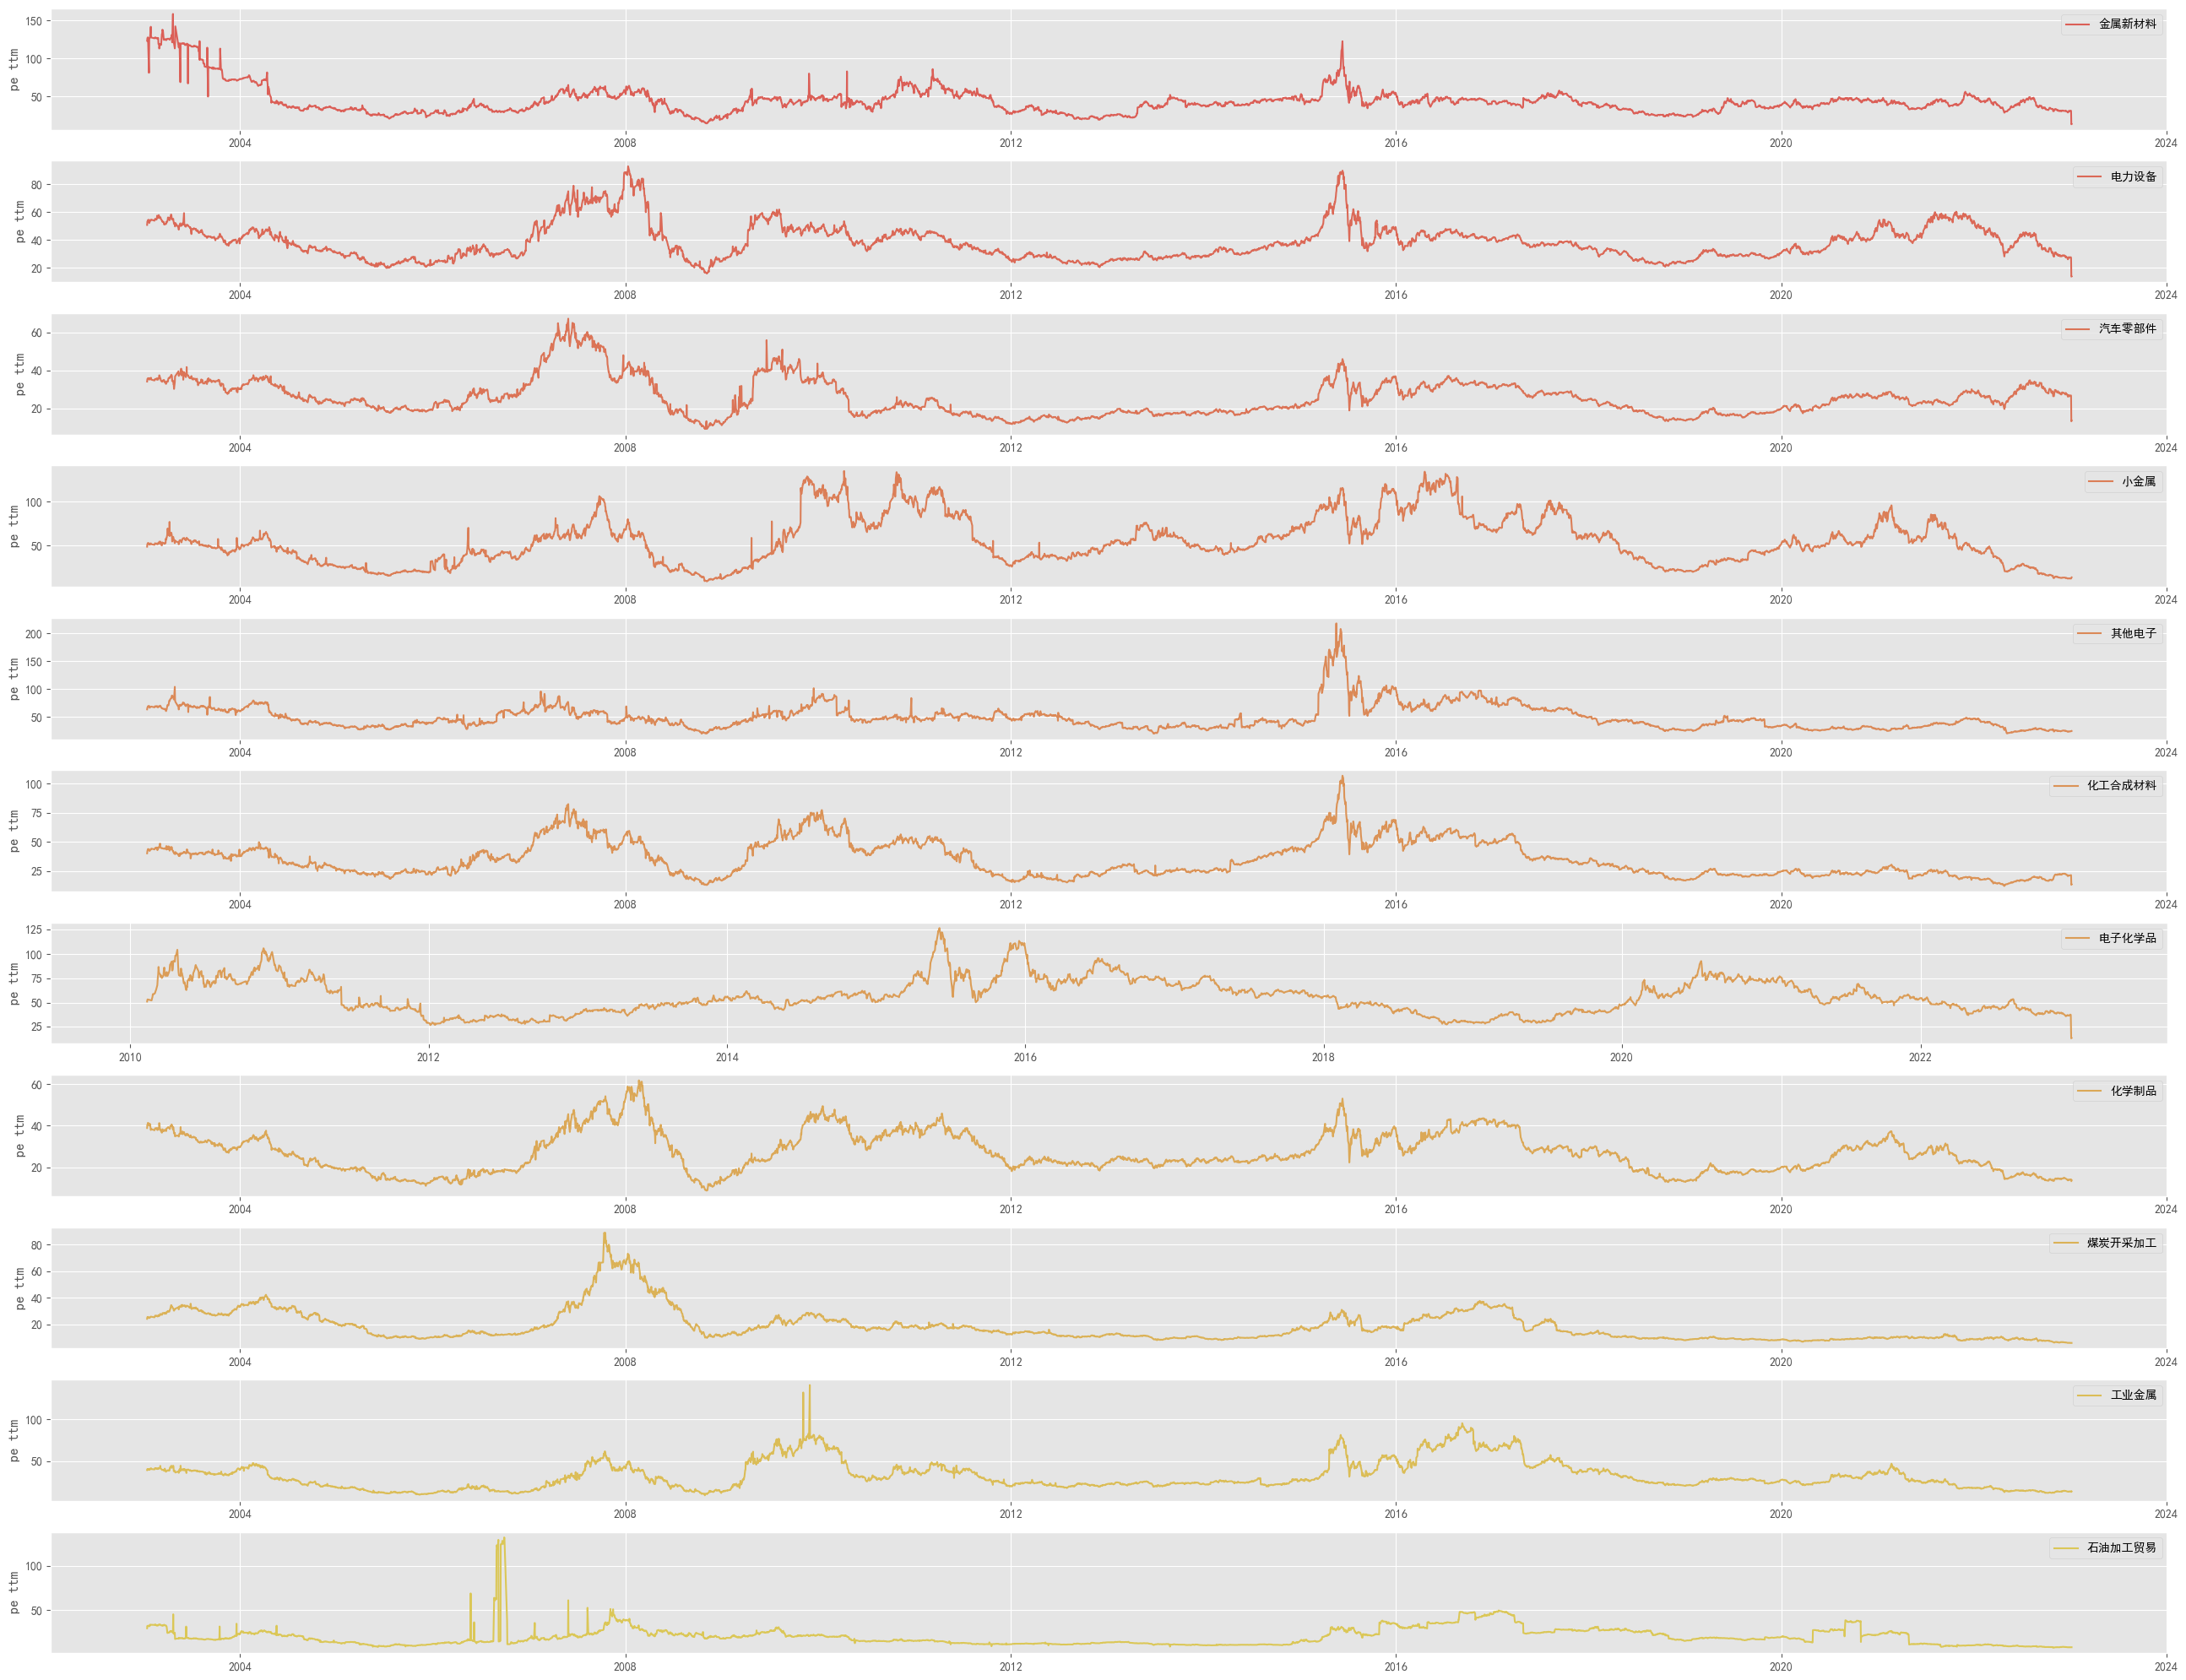

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.plotting.backend = "matplotlib"

print(mpl.get_cachedir())
plt.style.use('ggplot')
color_palette = sns.color_palette("hls", all_industry.shape[0])
plt.rcParams["font.sans-serif"] = ["SimHei"]
# plt.rcParams['font.serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(26, 20))

index = 0
for k,v in all_industry_pe.items():#all_industry.iterrows():
    # print(i)
    # print(row)
    industry = k
    plt.subplot(len(all_industry_pe.keys()), 1, index+1)
    all_industry_pe[industry]['average_pe'].plot(kind='line', figsize=(26, 20), color=color_palette[index], label=industry)
    plt.xlabel('')
    plt.ylabel('pe ttm')
    plt.legend()
    index += 1

plt.tight_layout()


In [13]:
all_industry_pe

{'金属新材料':                 total_mv    net_profit  stock_size  average_pe
 trade_date                                                    
 2003-01-13  2.420014e+06  1.966511e+04           6  123.061291
 2003-01-14  2.483737e+06  1.966509e+04           6  126.301825
 2003-01-15  2.501744e+06  1.966509e+04           6  127.217501
 2003-01-16  2.507267e+06  1.966510e+04           6  127.498330
 2003-01-17  2.121230e+06  1.781992e+04           5  119.037031
 ...                  ...           ...         ...         ...
 2022-12-30  2.037320e+07  6.674669e+05          23   30.523167
 2023-01-03  2.091484e+07  6.674666e+05          23   31.334658
 2023-01-04  2.062075e+07  6.674672e+05          23   30.894021
 2023-01-05  8.567178e+08  6.403221e+07         441   13.379482
 2023-01-06  8.224712e+09  6.005727e+08        4058   13.694783
 
 [4855 rows x 4 columns],
 '电力设备':                 total_mv    net_profit  stock_size  average_pe
 trade_date                                                

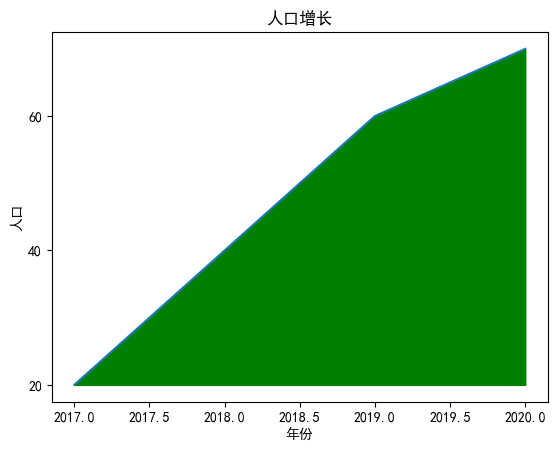

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_demo():
    #print(mpl.get_cachedir())
    # 绘制折线图
    plt.rcParams["font.sans-serif"] = ["SimHei"]  # 设置字体
    plt.rcParams["axes.unicode_minus"] = False  # 正常显示负号
    year = [2017, 2018, 2019, 2020]
    people = [20, 40, 60, 70]
    # 生成图表
    plt.plot(year, people)
    plt.xlabel('年份')
    plt.ylabel('人口')
    plt.title('人口增长')
    # 设置纵坐标刻度
    plt.yticks([0, 20, 40, 60, 80])
    # 设置填充选项：参数分别对应横坐标，纵坐标，纵坐标填充起始值，填充颜色
    plt.fill_between(year, people, 20, color='green')
    # 显示图表
    # plt.savefig("./plt.png")
    plt.show()

plot_demo()